# Case Study: Breast Cancer Detection

<img src="https://github.com/josefftan/josefftan.github.io/blob/master/assets/img/portfolio/breastcancer.png?raw=true" alt="Girl in a jacket" width="500" height="250" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Breast-Cancer-Detection" data-toc-modified-id="Case-Study:-Breast-Cancer-Detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Breast Cancer Detection</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries-and-dataset-importation" data-toc-modified-id="Libraries-and-dataset-importation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libraries and dataset importation</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data visualization</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data pre-processing</a></span></li><li><span><a href="#Model-creation" data-toc-modified-id="Model-creation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model creation</a></span></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model evaluation</a></span></li><li><span><a href="#Conlusion" data-toc-modified-id="Conlusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conlusion</a></span></li></ul></div>

# Introduction

Breast cancer is one of the most common cancer among women worldwide accounting for 25 percent of all cancer cases and affected 2.1 million people in 2015, with early diagnosis, they could significantly increases their chances of survival.The key challenge in cancer detection is how to classify tumors into malignant or benign. Machine learning techniques can dramatically improves the accuracy of diagnosis.

Research indicates that most experienced physicians can diagnose cancer with 79 percent accuracy while 91 percent correct diagnosis is achieved using machine learning techniques.So the first step in the cancer diagnosis process is to do what we call final needle aspirate or any process which is simply extracting some of the cells out of the tumor. And at that stage we don't know if that human is malignant or benign.

When we say benign that means that the tumor is kind of not spreading across the bodies of the patient and is safe somehow. if it's malignant that means it's cancerous that we need to intervene and actually stop the cancer growth. The idea is we want to teach the machine how to basically classify images or classify data and tell us if it's malignant or benign. for example. in this case without any human intervention.

**Probem**:
  - Predict if the cancer diagnosis is benign or malignant based on several observations/features

**Dataset**:
  - Radius (mean of distances from center to points on the perimeter)
  - Texture (standard deviation of gray-scale values)
  - Perimeter
  - Area
  - Smoothness (local variation in radius lengths)
  - Compactness (perimeter^2 / area - 1.0)
  - Concavity (severity of concave portions of the contour)
  - Concave points (number of concave portions of the contour)
  - Symmetry 
  - Fractal dimension ("coastline approximation" - 1)

**Source:** https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

# Libraries and dataset importation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Data exploration

In [3]:
# Check cancer dictionaries
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Target
print(cancer['target_names'])

['malignant' 'benign']


In [5]:
# Features
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
# Create dataframe
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [7]:
# Analyze dataset
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
# Analyze dataset
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
# Check for missing values
df_cancer.isnull().mean()

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
target                     0.0
dtype: float64

# Data visualization

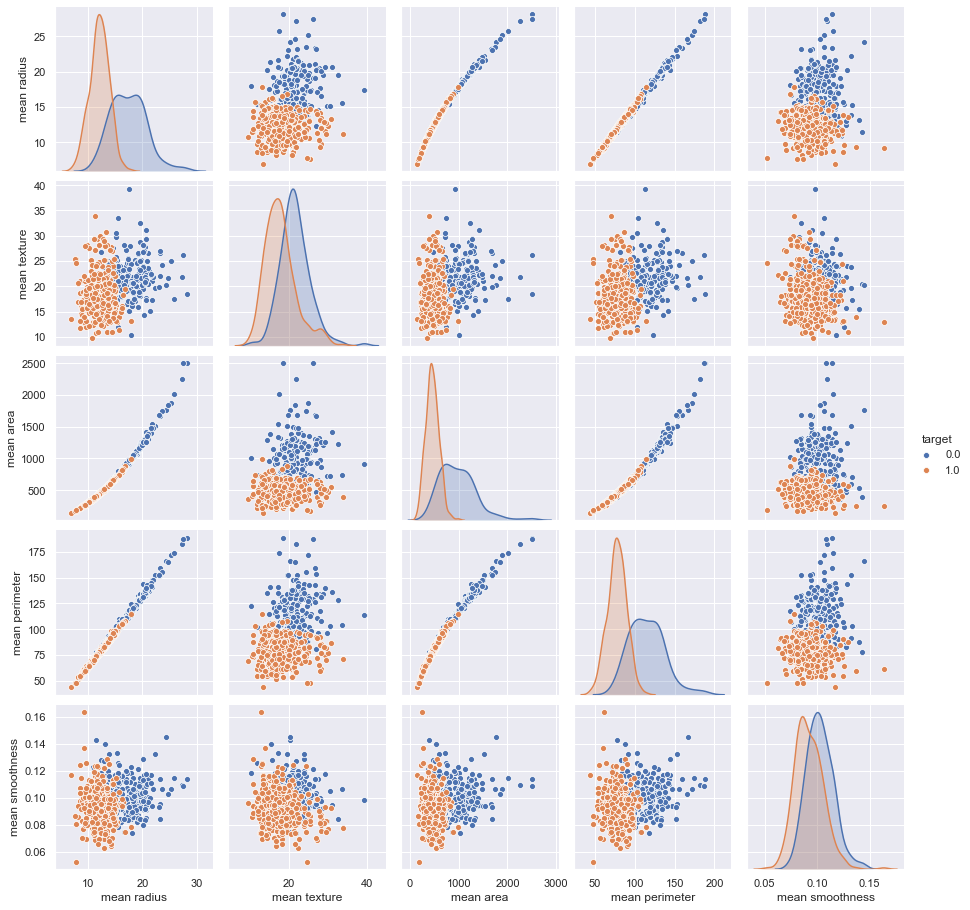

In [10]:
# Visualize the dataset
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )

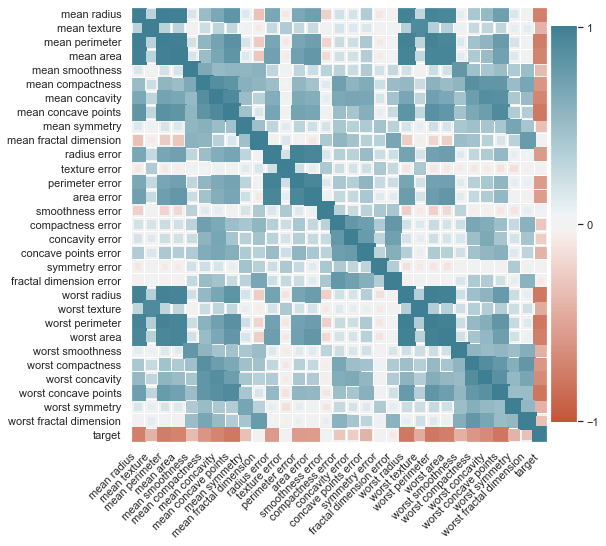

In [11]:
# Check correlation in the features by using heatmap
from heatmap import corrplot
plt.figure(figsize=(8, 8))
corrplot(df_cancer.corr(), size_scale=300)

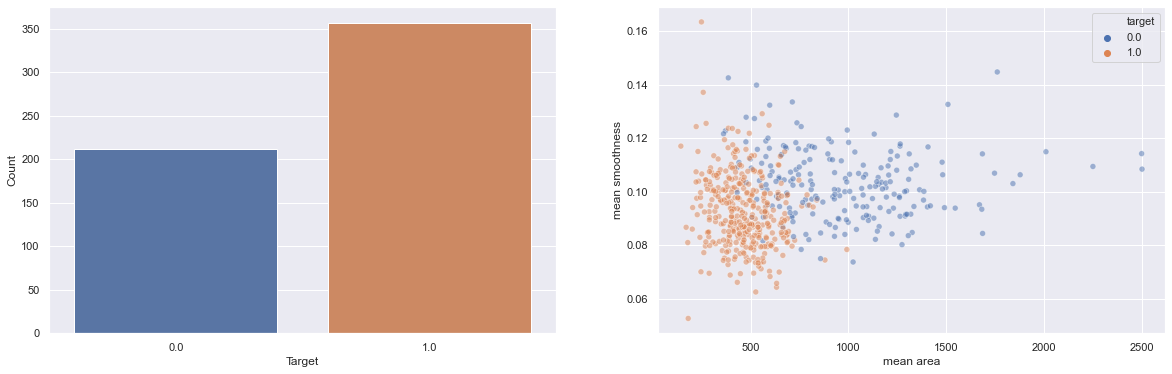

In [12]:
# Analyze the independent variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))

sns.countplot(df_cancer['target'], label = "Count", ax = ax1) 
ax1.set_xlabel("Target");
ax1.set_ylabel("Count");

sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', alpha= 0.5, data = df_cancer, ax = ax2)

# Data pre-processing

In [13]:
# Define the indepedent and dependent variables
x = df_cancer.drop(['target'], axis = 1)
y = df_cancer['target']

In [14]:
# Split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [15]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

# Model creation

In [16]:
# Create Machine Learning models
def models(X_train, y_train):
    
    # Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
    
    # use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    
    # Use SVM (Linear Kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
    
    # Use SVM (RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)
    
    # Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    # Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    # Use RandomforestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
    
    # Use XGBoost Classifer
    from xgboost import XGBClassifier
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    
    # Print the training accuracy for each model
    print('model[0] Logistic Regression Training Accuracy: ', log.score(X_train, y_train))
    print('model[1] KNNeighbors Training Accuracy: ', knn.score(X_train, y_train))
    print('model[2] SVC Linear Training Accuracy: ', svc_lin.score(X_train, y_train))
    print('model[3] SVC RBF Training Accuracy: ', svc_rbf.score(X_train, y_train))
    print('model[4] Gauss Training Accuracy: ', gauss.score(X_train, y_train))
    print('model[5] Decision Tree  Training Accuracy: ', tree.score(X_train, y_train))
    print('model[6] Random Forest Training Accuracy: ', forest.score(X_train, y_train))
    print('model[7] XGBoost Training Accuracy: ', xgb.score(X_train, y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest, xgb

# Model evaluation

In [17]:
# Show Training accuracy score
model = models(X_train, y_train)

model[0] Logistic Regression Training Accuracy:  0.989010989010989
model[1] KNNeighbors Training Accuracy:  0.978021978021978
model[2] SVC Linear Training Accuracy:  0.989010989010989
model[3] SVC RBF Training Accuracy:  0.9846153846153847
model[4] Gauss Training Accuracy:  0.9472527472527472
model[5] Decision Tree  Training Accuracy:  1.0
model[6] Random Forest Training Accuracy:  1.0
model[7] XGBoost Training Accuracy:  1.0


In [18]:
# Show the confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

for i in range( len(model) ):
    cm = confusion_matrix(y_test, model[i].predict((X_test)))
    
    # Extract TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
    
    test_score = (TP + TN) / (TN + FP + FN + TP)
    
    print('model[{}] Testing Accuracy: "{}"'.format(i, test_score))

model[0] Testing Accuracy: "0.9649122807017544"
model[1] Testing Accuracy: "0.956140350877193"
model[2] Testing Accuracy: "0.9824561403508771"
model[3] Testing Accuracy: "0.9824561403508771"
model[4] Testing Accuracy: "0.9035087719298246"
model[5] Testing Accuracy: "0.9298245614035088"
model[6] Testing Accuracy: "0.9736842105263158"
model[7] Testing Accuracy: "0.9824561403508771"


In [19]:
# Create confusion matrix function
y_predict = model[7].predict(X_test)
cm = confusion_matrix(y_test, y_predict)

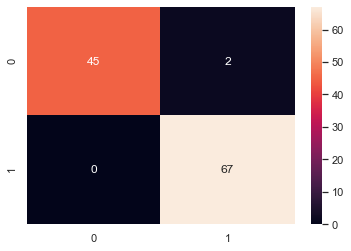

In [20]:
# Show confusion matrix
sns.heatmap(cm, annot=True)

In [21]:
# Check f1, precision and recall score
from sklearn.metrics import f1_score, precision_score, recall_score
UsedFitter = model[7]

print('Precision Score:', precision_score(y_test, UsedFitter.predict(X_test)))
print('Recall Score:', recall_score(y_test, UsedFitter.predict(X_test)))
print('f1_score:', f1_score(y_test, UsedFitter.predict(X_test)))

Precision Score: 0.9710144927536232
Recall Score: 1.0
f1_score: 0.9852941176470589


In [22]:
# Implement-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = UsedFitter, X = X_train, y = y_train, cv = 10)
print('Mean Accuracy:', accuracies.mean())
print('Standard Deviation:', accuracies.std())

Mean Accuracy: 0.9604347826086956
Standard Deviation: 0.02757472519245102


In [23]:
# Get feature importance
importances = pd.DataFrame({'feature': x.columns, 'importance': np.round(UsedFitter.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
print(importances.head(10))

                      importance
feature                         
worst concave points       0.353
mean concave points        0.211
worst perimeter            0.077
mean radius                0.075
worst area                 0.056
mean area                  0.031
worst concavity            0.027
radius error               0.026
worst texture              0.018
mean symmetry              0.016


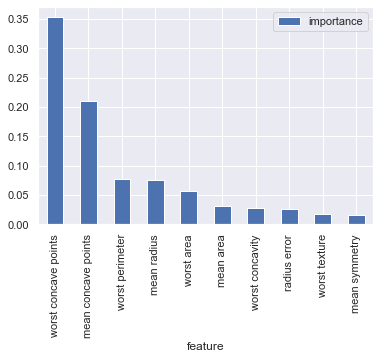

In [24]:
# Visualize the importance
importances.head(10).plot.bar()
plt.show()

# Conlusion

The importance of certain features varies to different model but in this case we used XGboost method which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models. In this model, we could see that concave point has the highest influence whether a patient is malignant or benign.

Machine learning technique was able to classify tumors into malignant or benign with 96% accuracy. The technique can rapidly evaluate breast masses and classify them in an automated fashion. Early breast cancer can dramatically save lives especially in developing world. The technique can be further improved by combining computer vision/ML techniques to directly classify cancer using tissue images.